In [1]:
import string
import re
import codecs
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support

In [3]:
df=pd.read_csv(r"Language Detection.csv")
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [4]:
df['Language'].unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

In [5]:
# Create a translation table to remove punctuation using dictionary comprehension
translation_table = dict((ord(char), None) for char in string.punctuation)

## TEXT PREPROCESSING

In [6]:
processed_data=pd.DataFrame(columns=['text','language'])
def clean_data(data,lang):
    global processed_data
    data_list=[]
    lang_list=[]
    for i,line in data.iterrows():
        line=line['Text']
        # print(line)
        if len(line) !=0:
            line=line.lower()
            #removing digits
            line=re.sub(r"\d+","",line)
            #remove punctuations
            line=line.translate(translation_table)
            data_list.append(line)
            lang_list.append(lang)
    # Iterate through the lists and append rows to the DataFrame
    for text, lang in zip(data_list, lang_list):
        processed_data=processed_data.append({'text':text,'language':lang},ignore_index=True)

In [7]:
for i in df['Language'].unique():
    clean_data(df[df['Language']==i],i)

In [8]:
processed_data

,text,language
0,nature in the broadest sense is the natural p...,English
1,nature can refer to the phenomena of the physi...,English
2,the study of nature is a large if not the only...,English
3,although humans are part of nature human activ...,English
4,the word nature is borrowed from the old fren...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [9]:
processed_data[processed_data['language']=='German']

,text,language
9498,wir sind alle auf der suche nach schnellen weg...,German
9499,ich weiß ich verstehe was passiert ist dass nu...,German
9500,wie wäre es also mit uns,German
9501,lernen sie einige intelligente neue englische ...,German
9502,also werden wir heute neue intelligente wörte...,German
...,...,...
9963,narcisa änderte ihre art und weise sie kämpfte...,German
9964,wie s narzissmus jetzt erzählt marian beiden a...,German
9965,hat sie ich denke sie würde jetzt kein goldbro...,German
9966,terry du siehst tatsächlich ein bisschen wie d...,German


## splitting data into train and test sets

In [10]:
X,y=processed_data.iloc[:,0], processed_data.iloc[:,1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8269,) (2068,) (8269,) (2068,)


## vectorizer and model fitting pipeline

In [11]:
vectorizer=feature_extraction.text.TfidfVectorizer(ngram_range=(1,3),analyzer='char')

In [12]:
pipeline_ldm=pipeline.Pipeline([
    ('vectorizer',vectorizer),
    ('clf',linear_model.LogisticRegression())
])

## model fitting

In [13]:
pipeline_ldm.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', LogisticRegression())])

## model prediction

In [14]:
y_pred=pipeline_ldm.predict(X_test)
y_pred

array(['Spanish', 'Turkish', 'Russian', ..., 'English', 'Spanish',
       'German'], dtype=object)

## model evaluation

In [15]:
acc=(metrics.accuracy_score(y_test,y_pred)*100)
acc

98.0174081237911

In [16]:
class_names = ['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada']

In [17]:
matrix=metrics.confusion_matrix(y_test,y_pred,labels=class_names)
print("conf matrix: \n",matrix)

conf matrix: 
 [[256   0   0   0   0   1   1   0   0   0   0   2   0   0   0   0   0]
 [  0 114   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  18   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  91   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 147   0   0   3   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 193   0   1   0   0   0   1   0   0   0   0   0]
 [  2   0   0   0   0   0 103   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   2   0   1 152   0   0   0   2   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0  70   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 142   0   0   0   0   0   0   0]
 [  1   0   0   0   0   1   0   1   0   0  72   0   0   2   0   0   0]
 [  0   0   0   0   3   0   0   3   0   0   1 145   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0  96   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   2   1   0 135   0 

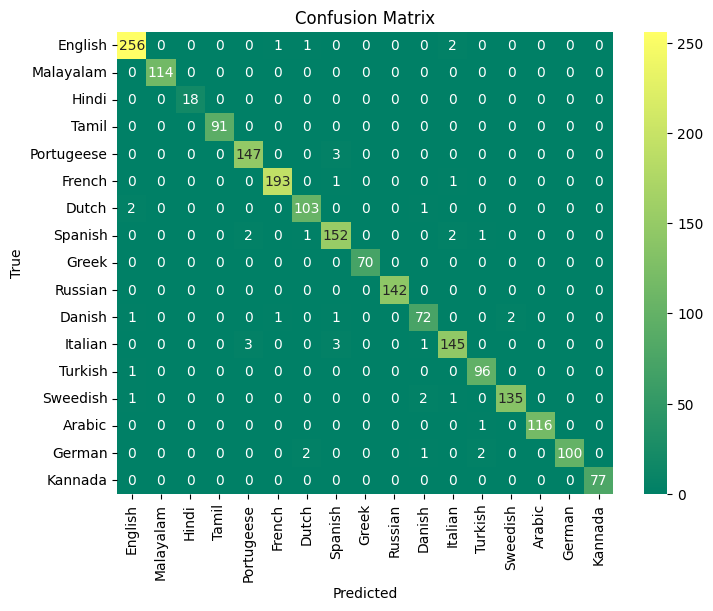

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='summer',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [19]:
precision,recall, f1_score, _ = metrics.precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1_score:.2f}")

Precision: 0.98
Recall: 0.98
F1-score: 0.98


In [20]:
from sklearn.metrics import classification_report

# Example true labels and predicted labels
true_labels = [0, 1, 2, 0, 1, 2]
predicted_labels = [0, 1, 1, 0, 2, 2]

report = metrics.classification_report(y_test,y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       117
      Danish       0.94      0.94      0.94        77
       Dutch       0.96      0.97      0.97       106
     English       0.98      0.98      0.98       260
      French       0.99      0.99      0.99       195
      German       1.00      0.95      0.98       105
       Greek       1.00      1.00      1.00        70
       Hindi       1.00      1.00      1.00        18
     Italian       0.96      0.95      0.96       152
     Kannada       1.00      1.00      1.00        77
   Malayalam       1.00      1.00      1.00       114
  Portugeese       0.97      0.98      0.97       150
     Russian       1.00      1.00      1.00       142
     Spanish       0.95      0.96      0.96       158
    Sweedish       0.99      0.97      0.98       139
       Tamil       1.00      1.00      1.00        91
     Turkish       0.96      0.99      0.97        97

   

## model saving and loading

In [21]:
import pickle
pickle.dump(pipeline_ldm,open( '{}.pkl'.format('LR_LD'),'wb'))

In [22]:
def lang_predict(text):
    text="".join(text.split())
    text=text.lower()
    text=re.sub(r"\d+","",text)
    #remove punctuations
    text=text.translate(translation_table)
    model=pickle.load(open( "{}.pkl".format('LR_LD'),"rb"))
    pred=model.predict([text])
    return pred[0]
    

In [23]:
test_list=["The quick brown fox jumps over the lazy dog",'Ο γρήγορος καφέ αλεπού πηδάει πάνω από το τεμπέλικο σκύλο.','Быстрая коричневая лиса прыгает через ленивую собаку.','La volpe veloce salta sopra il cane pigro.','Hızlı kahverengi tilki tembel köpeğin üstünden atlar.','Den snabba bruna räven hoppar över den lata hunden.','الثعلب البني السريع يقفز فوق الكلب الكسول.','Der schnelle braune Fuchs springt über den faulen Hund.','ವೇಗವಾಗಿ ಕೂತುಕೊಳ್ಳುವ ಹಳ್ಳಿಗಾಲಿಕೆಯ ನರಿ ಮಂಚವನ್ನು ನೆದೆಯ ನರಿಯ ಮೇಲೆ ಸ್ವಲ್ಪವಾಗಿ ಹಾದುಹೋಗುತ್ತಾನೆ.',"വേഗത്തിൽ കിടന്ന് നടൻ വളർത്തുക.",'जल्दी का काम शैतान का होता है।','வேகமாக நடக்க அலறுவேன், குழந்தைகள் பழிவாங்குவார்கள்.','O rápido rapaz marrom pula sobre o cão preguiçoso.','Le rapide renard brun saute par-dessus le chien paresseux.','El rápido zorro marrón salta sobre el perro perezoso.']
for lang in test_list:
    print(lang, "prediction: {}".format(lang_predict(lang)) )


The quick brown fox jumps over the lazy dog prediction: English
Ο γρήγορος καφέ αλεπού πηδάει πάνω από το τεμπέλικο σκύλο. prediction: Greek
Быстрая коричневая лиса прыгает через ленивую собаку. prediction: Russian
La volpe veloce salta sopra il cane pigro. prediction: Italian
Hızlı kahverengi tilki tembel köpeğin üstünden atlar. prediction: Turkish
Den snabba bruna räven hoppar över den lata hunden. prediction: Sweedish
الثعلب البني السريع يقفز فوق الكلب الكسول. prediction: Arabic
Der schnelle braune Fuchs springt über den faulen Hund. prediction: German
ವೇಗವಾಗಿ ಕೂತುಕೊಳ್ಳುವ ಹಳ್ಳಿಗಾಲಿಕೆಯ ನರಿ ಮಂಚವನ್ನು ನೆದೆಯ ನರಿಯ ಮೇಲೆ ಸ್ವಲ್ಪವಾಗಿ ಹಾದುಹೋಗುತ್ತಾನೆ. prediction: Kannada
വേഗത്തിൽ കിടന്ന് നടൻ വളർത്തുക. prediction: Malayalam
जल्दी का काम शैतान का होता है। prediction: Hindi
வேகமாக நடக்க அலறுவேன், குழந்தைகள் பழிவாங்குவார்கள். prediction: Tamil
O rápido rapaz marrom pula sobre o cão preguiçoso. prediction: Portugeese
Le rapide renard brun saute par-dessus le chien paresseux. prediction: French
El rá

In [24]:
lang_predict("তাড়াতাড়ি ধরা চাঁদ ইঁদুর ফাঁদে পড়ে যায়।")

'Turkish'

In [25]:
# data_eng=[]
# lang_eng=[]
# for i,line in eng_df.iterrows():
#     line=line['Text']
#     print(line)
#     if len(line) !=0:
#         line=line.lower()
#         #removing digits
#         line=re.sub(r"\d+","",line)
#         #remove punctuations
#         line=line.translate(translate_table)
#         data_eng.append(line)
#         lang_eng.append("English")